<a id="Exploratory Data Analysis"></a>

# Re3d Dataset Exploratory Data Analysis

The Re3d Dataset is a dataset compiled for Named Entity Recognition (NER) on the subject of National Defense. The data includes sources such as:

* Australian Department of Foreign Affiars
* BBC Online
* CENTCOM
* Delegation of the European Union to Syria
* UK Government
* US State Department
* Wikipedia

This notebook explores the prepared dataset.

In [2]:
from pathlib import Path
import pandas as pd

In [3]:
ROOT_DIR = Path('notebooks/eda.ipynb').resolve().parents[2]
DATA_DIR = ROOT_DIR / "data"
PREPARED_DIR = DATA_DIR / "prepared"

In [4]:
from ast import literal_eval


df = pd.read_csv(PREPARED_DIR / "master.csv")
df["tags"] = df["tags"].apply(literal_eval)
df["single_tag"] = df["tags"].apply(lambda x: x[0])
df.head()

,sentence_num,word,start_idx,end_idx,tags,single_tag
0,0,This,0,4,[B-Temporal],B-Temporal
1,0,week,5,9,[I-Temporal],I-Temporal
2,0,sees,10,14,[O],O
3,0,the,15,18,[O],O
4,0,start,19,24,[O],O


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25168 entries, 0 to 25167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentence_num  25168 non-null  int64 
 1   word          25168 non-null  object
 2   start_idx     25168 non-null  int64 
 3   end_idx       25168 non-null  int64 
 4   tags          25168 non-null  object
 5   single_tag    25168 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [6]:
type(df["tags"][0])

list

In [7]:
df['single_tag'].value_counts()

O                      17153
I-Organisation          1867
B-Organisation          1402
B-Location               943
I-Location               875
I-Person                 748
B-Person                 552
I-Temporal               259
B-Temporal               214
B-Quantity               199
I-DocumentReference      128
B-Nationality            123
I-Quantity               106
B-Weapon                 106
I-MilitaryPlatform        94
I-Weapon                  89
B-MilitaryPlatform        77
B-DocumentReference       59
I-Money                   42
I-Coordinate              40
B-Money                   27
I-Vehicle                 16
B-Vehicle                 13
B-Coordinate               8
I-CommsIdentifier          8
I-Nationality              7
I-Frequency                6
B-CommsIdentifier          4
B-Frequency                3
Name: single_tag, dtype: int64

In [8]:
percentage_O = df['single_tag'].value_counts()["O"] / sum(df['single_tag'].value_counts())
print(f"Percentage of tags that are O: {percentage_O *100:0.2f}%")

Percentage of tags that are O: 68.15%


As shown above, only ~68% of the dataset are "O" tags, and quite a few tags are very sparse. It may be wise to drop those tags during experimentation, depending on performance.

In [9]:
words = set(list(df['word'].values))
words.add('PADword')
n_words = len(words)
print(f"There are {n_words} unique words")

There are 4332 unique words


In [10]:
tags = list(set(df["single_tag"].values))
n_tags = len(tags)
print(f"There are {n_tags} unique tags")

There are 29 unique tags


In [11]:
class SentenceGetter:
    """Iterator to get a sentence sequence and its BIO tags"""
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),s["single_tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence_num").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

In [12]:
getter = SentenceGetter(df)
sent = getter.get_next()
for i in sent:
  print(i)

('A', 'O')
('series', 'O')
('of', 'O')
('bilateral', 'O')
('meetings', 'O')
('will', 'O')
('take', 'O')
('place', 'O')
('between', 'O')
('senior', 'B-Organisation')
('officials', 'I-Organisation')
('of', 'I-Organisation')
('the', 'I-Organisation')
('EU', 'I-Organisation')
('and', 'O')
('representatives', 'O')
('of', 'O')
('the', 'O')
('Ministers', 'B-Organisation')
('of', 'I-Organisation')
('Foreign', 'I-Organisation')
('Affairs', 'I-Organisation')
('of', 'O')
('Iran', 'B-Location')
(',', 'O')
('\xa0', 'O')
('Saudi', 'B-Location')
('Arabia', 'I-Location')
(',', 'O')
('\xa0', 'O')
('the', 'O')
('\xa0', 'O')
('United', 'B-Location')
('Arab', 'I-Location')
('Emirates', 'I-Location')
(',', 'O')
('Egypt', 'B-Location')
(',', 'O')
('Jordan', 'B-Location')
('and', 'O')
('Lebanon', 'B-Location')
(',', 'O')
('and', 'O')
('\xa0', 'O')
('in', 'O')
('the', 'O')
('coming', 'O')
('days', 'O')
('with', 'O')
('Turkey', 'B-Location')
('and', 'O')
('Qatar', 'B-Location')
('.', 'O')
('\n', 'O')


In [14]:
sentences = getter.sentences
print(f"There are {len(sentences)} total sentence")

There are 1013 total sentence


In [15]:
sentences[1]

[('A', 'O'),
 ('series', 'O'),
 ('of', 'O'),
 ('bilateral', 'O'),
 ('meetings', 'O'),
 ('will', 'O'),
 ('take', 'O'),
 ('place', 'O'),
 ('between', 'O'),
 ('senior', 'B-Organisation'),
 ('officials', 'I-Organisation'),
 ('of', 'I-Organisation'),
 ('the', 'I-Organisation'),
 ('EU', 'I-Organisation'),
 ('and', 'O'),
 ('representatives', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('Ministers', 'B-Organisation'),
 ('of', 'I-Organisation'),
 ('Foreign', 'I-Organisation'),
 ('Affairs', 'I-Organisation'),
 ('of', 'O'),
 ('Iran', 'B-Location'),
 (',', 'O'),
 ('\xa0', 'O'),
 ('Saudi', 'B-Location'),
 ('Arabia', 'I-Location'),
 (',', 'O'),
 ('\xa0', 'O'),
 ('the', 'O'),
 ('\xa0', 'O'),
 ('United', 'B-Location'),
 ('Arab', 'I-Location'),
 ('Emirates', 'I-Location'),
 (',', 'O'),
 ('Egypt', 'B-Location'),
 (',', 'O'),
 ('Jordan', 'B-Location'),
 ('and', 'O'),
 ('Lebanon', 'B-Location'),
 (',', 'O'),
 ('and', 'O'),
 ('\xa0', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('coming', 'O'),
 ('days', 'O'),
 ('with', 'O

In [17]:
largest_sen = max(len(sen) for sen in sentences)
print('Biggest sentence has {} words'.format(largest_sen))

Biggest sentence has 99 words


What is the distribution of words in a sentence?

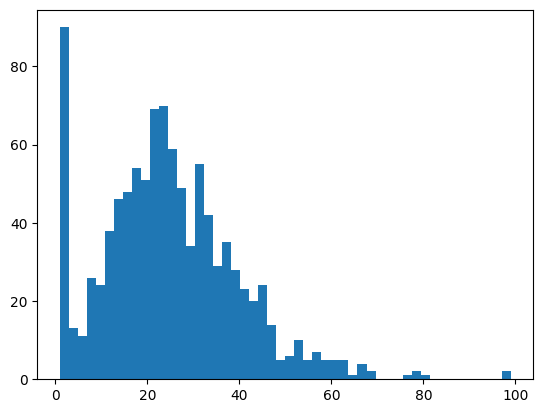

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist([len(sen) for sen in sentences], bins= 50)
plt.show()

Looks like most sentences have less than 50 words. That is a good start for our max sequence length.

In [19]:
# Make indices for ML modeling
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}

In [20]:
words2index

{'stem': 0,
 'historically': 1,
 'inside': 2,
 'River': 3,
 'Kitab': 4,
 'km': 5,
 'association': 6,
 'has': 7,
 'target': 8,
 'Minorities': 9,
 'deployment': 10,
 'try': 11,
 'enabling': 12,
 'anniversary': 13,
 'States': 14,
 "'ll": 15,
 'same': 16,
 'Raqqa': 17,
 'Before': 18,
 'leading': 19,
 'general': 20,
 'Manama': 21,
 'values': 22,
 'Gareth': 23,
 'A': 24,
 'scripture': 25,
 'conducting': 26,
 'strongest': 27,
 'welcome': 28,
 'successful': 29,
 'permitting': 30,
 'island.[2': 31,
 'definitive': 32,
 'hard': 33,
 'fortifications': 34,
 'Bayji': 35,
 'discussions': 36,
 'Justice': 37,
 'listings': 38,
 'powered': 39,
 'exercises': 40,
 'Were': 41,
 'first': 42,
 'bombardment': 43,
 'bunkers': 44,
 'Higher': 45,
 'flow': 46,
 'messaging': 47,
 'disagreement': 48,
 'present': 49,
 'etc': 50,
 'Tobias': 51,
 'irrigation.[3': 52,
 'included': 53,
 'Buried': 54,
 'way': 55,
 'enjoyable': 56,
 'Royal': 57,
 '2006': 58,
 '3/4': 59,
 'transferred': 60,
 'HotBird': 61,
 'Home': 62,
 'ac

In [21]:
tags2index

{'B-Temporal': 0,
 'B-Coordinate': 1,
 'I-Person': 2,
 'I-Vehicle': 3,
 'B-Organisation': 4,
 'I-Location': 5,
 'I-Coordinate': 6,
 'B-Money': 7,
 'B-Quantity': 8,
 'B-Frequency': 9,
 'I-Money': 10,
 'B-DocumentReference': 11,
 'B-Location': 12,
 'I-Organisation': 13,
 'I-Temporal': 14,
 'I-DocumentReference': 15,
 'B-Person': 16,
 'B-Vehicle': 17,
 'I-Quantity': 18,
 'B-CommsIdentifier': 19,
 'O': 20,
 'B-MilitaryPlatform': 21,
 'I-Weapon': 22,
 'I-CommsIdentifier': 23,
 'I-MilitaryPlatform': 24,
 'B-Nationality': 25,
 'I-Frequency': 26,
 'B-Weapon': 27,
 'I-Nationality': 28}